## Bayesian inference for perceptual psychophysics
We consider a few simple examples in which we can compute both the posterior as well as the posterior mean estimate for the location of a stimulus source based on one or more observations and a prior. This notebook demonstrates how generally the estimate improves as more observations are collected.

Let's start by loading a few packages for numerical computation and plotting.

In [17]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

Our first example will involve generating a stimulus $s$ from a normally distributed prior ${\mathcal N}(\mu, \sigma_2^2)$ with mean $\mu$ and variance $\sigma_s^2$ and then using this to generate an observation $x$ from a normal distribution ${\mathcal N}(s, \sigma^2)$ with the stimulus value $s$ as its mean and variance $\sigma^2$. Finally, we will compute the unscaled posterior by taking the product of the prior and the likelihood function.

In [18]:
mu = 0     # chosen value for \mu, the mean of the prior
sigmas = 2     # standard deviation of the prior distribution.
s = np.random.normal(mu, sigmas, 1)
sigma1 = 1
x1 = np.random.normal(s, sigma1, 1)
ss = np.linspace(-10,10)        # vector of possible s values for parameter fitting
L1 = np.exp(-np.power(ss-x1,2)/2/sigma1/sigma1)*np.exp(-np.power(ss-mu,2)/2/sigmas/sigmas)
L1m = np.max(L1)
L1 = L1/L1m

Now we plot the updated posterior to see where the peak of the posterior is relative to the true value of $s$.

Text(0, 0.5, 'likelihood')

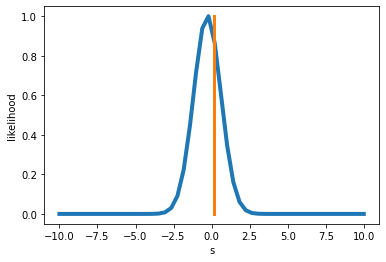

In [19]:
plt.plot(ss,L1,linewidth=4.0)   # plotting the likelihood fnction
plt.plot([s, s],[0, 1],linewidth=3.0)
plt.xlabel('s')         # label for x-axis
plt.ylabel('likelihood')      # label for y-axis

Now, let's repeat the process, updating the posterior with another observation.

In [20]:
x2 = np.random.normal(s, sigma1, 1)
L2 = np.exp(-np.power(ss-x2,2)/2/sigma1/sigma1)*L1
L2m = np.max(L2)
L2 = L2/L2m

Text(0, 0.5, 'likelihood')

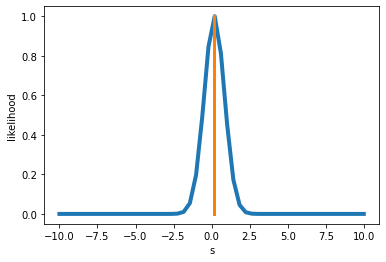

In [21]:
plt.plot(ss,L2,linewidth=4.0)   # plotting the likelihood fnction
plt.plot([s, s],[0, 1],linewidth=3.0)
plt.xlabel('s')         # label for x-axis
plt.ylabel('likelihood')      # label for y-axis

Now, let's repeat 8 more times, to get a very precise estimate of the stimulus value.

In [22]:
xv = np.random.normal(s, sigma1, 8)

L10 = L2
for k in range(8):
    L10 = np.exp(-np.power(ss-xv[k],2)/2/sigma1/sigma1)*L10

L10m = np.max(L10)
L10 = L10/L10m

Text(0, 0.5, 'likelihood')

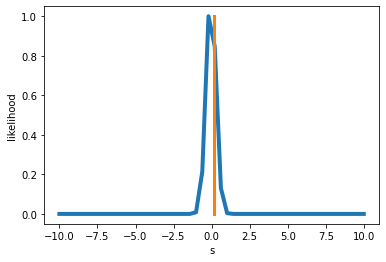

In [23]:
plt.plot(ss,L10,linewidth=4.0)   # plotting the likelihood fnction
plt.plot([s, s],[0, 1],linewidth=3.0)
plt.xlabel('s')         # label for x-axis
plt.ylabel('likelihood')      # label for y-axis